In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
paths = {'NoDepth'       :{'derivative_slope'     :'/Path/To/CSV/With/Evaluation/Data/For/Derivative/Slope/'     ,
                           'integral_ratio'       :'/Path/To/CSV/With/Evaluation/Data/For/Integral/Ratio/'       ,
                           'symmetric_sampling'   :'/Path/To/CSV/With/Evaluation/Data/For/Symmetric/Sampling/'   ,
                           'estimation_correction':'/Path/To/CSV/With/Evaluation/Data/For/Estimation/Correction/',
                           },
         'WithDepth'     :{'derivative_slope'     :'/Path/To/CSV/With/Evaluation/Data/For/Derivative/Slope/With/Depth/'     ,
                           'integral_ratio'       :'/Path/To/CSV/With/Evaluation/Data/For/Integral/Ratio/With/Depth/'       ,
                           'symmetric_sampling'   :'/Path/To/CSV/With/Evaluation/Data/For/Symmetric/Sampling/With/Depth/'   ,
                           'estimation_correction':'/Path/To/CSV/With/Evaluation/Data/For/Estimation/Correction/With/Depth/',
                           },
         'Urban'         :{'estimation_correction':'/Path/To/CSV/With/Evaluation/Data/For/The/Urban/Senario/',
                           },
         'OverTheSoulder':{'estimation_correction':'/Path/To/CSV/With/Evaluation/Data/For/The/Over/The/Shoulder/Senario/',
                           },
                    }

In [4]:
df1 = pd.read_csv(paths['NoDepth']['derivative_slope'     ])
df2 = pd.read_csv(paths['NoDepth']['integral_ratio'       ])
df3 = pd.read_csv(paths['NoDepth']['symmetric_sampling'   ])
df4 = pd.read_csv(paths['NoDepth']['estimation_correction'])

In [5]:
def clean_df(df):
    # Columns to check
    columns_to_check = ['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']

    # Define witch objects to remove from witch column
    object_column = 'Object'
    problematic_object = 'CerealBox'

    # Remove rows where the specified columns have the same value across the row
    df_filtered = df[~df[columns_to_check].apply(lambda x: x.nunique() == 1, axis=1)]

    # Now, remove rows that have the specific value in the specified column
    df_filtered = df_filtered[df_filtered[object_column] != problematic_object]

    return df_filtered

In [6]:
def get_results(paths, depth=False):

    # Choose paths for the dataframes
    if depth:
        df1 = pd.read_csv(paths['WithDepth']['derivative_slope'     ])
        df2 = pd.read_csv(paths['WithDepth']['integral_ratio'       ])
        df3 = pd.read_csv(paths['WithDepth']['symmetric_sampling'   ])
        df4 = pd.read_csv(paths['WithDepth']['estimation_correction'])
    else:
        df1 = pd.read_csv(paths['NoDepth']['derivative_slope'     ])
        df2 = pd.read_csv(paths['NoDepth']['integral_ratio'       ])
        df3 = pd.read_csv(paths['NoDepth']['symmetric_sampling'   ])
        df4 = pd.read_csv(paths['NoDepth']['estimation_correction'])

    # Clean dfs
    filtered_df1 = clean_df(df1) * 100
    filtered_df2 = clean_df(df2) * 100
    filtered_df3 = clean_df(df3) * 100
    filtered_df4 = clean_df(df4) * 100

    # Calculate the mean for each column in each dataframe
    mean_df1 = filtered_df1[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].mean()
    mean_df2 = filtered_df2[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].mean()
    mean_df3 = filtered_df3[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].mean()
    mean_df4 = filtered_df4[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].mean()

    # Daviation dfs
    mean_deviations_df1 = filtered_df1[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].sub(mean_df1).abs().mean()
    mean_deviations_df2 = filtered_df2[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].sub(mean_df2).abs().mean()
    mean_deviations_df3 = filtered_df3[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].sub(mean_df3).abs().mean()
    mean_deviations_df4 = filtered_df4[['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']].sub(mean_df4).abs().mean()

    # Create a new DataFrame to store the means from each original dataframe
    df_means = pd.DataFrame({
        'df1': mean_df1,
        'df2': mean_df2,
        'df3': mean_df3,
        'df4': mean_df4
    })

    # Transpose the dataframe so that each row corresponds to an original dataframe
    df_means = df_means.transpose()

    # Rename the index to match the original dataframe names
    df_means.index = ['derivative_slope', 'integral_ratio', 'symmetric_sampling', 'estimation_correction']

    # Create a new DataFrame to store the stds from each original dataframe
    df_std = pd.DataFrame({
        'df1': mean_deviations_df1,
        'df2': mean_deviations_df2,
        'df3': mean_deviations_df3,
        'df4': mean_deviations_df4
    })

    # Transpose the dataframe so that each row corresponds to an original dataframe
    df_std = df_std.transpose()

    # Rename the index to match the original dataframe names
    df_std.index = ['derivative_slope', 'integral_ratio', 'symmetric_sampling', 'estimation_correction']

    # Assuming you have two DataFrames: df_means and df_std with the same size and matching indices/columns

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 5))

    # Generate the heatmap
    sns.heatmap(df_means, annot=False, fmt="", cmap='RdYlGn', ax=ax, vmax=100.0)

    # Add the standard deviation to each cell
    for i in range(df_means.shape[0]):     # Loop over rows
        for j in range(df_means.shape[1]): # Loop over columns
            mean_value = df_means.iloc[i, j]
            std_value = df_std.iloc[i, j]
            text = f"{mean_value:.2f}%\n±{std_value:.2f}"
            
            # Place the text in the cell
            plt.text(j + 0.5, i + 0.5, text, 
                    horizontalalignment='center', 
                    verticalalignment='center', 
                    fontsize=10, color='black')

    # Adjust layout to make room for the colorbar
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    # Set the colorbar labels to percentage
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])

    # Show the plot
    plt.show()

    


/tmp/ipykernel_86857/3652594700.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])


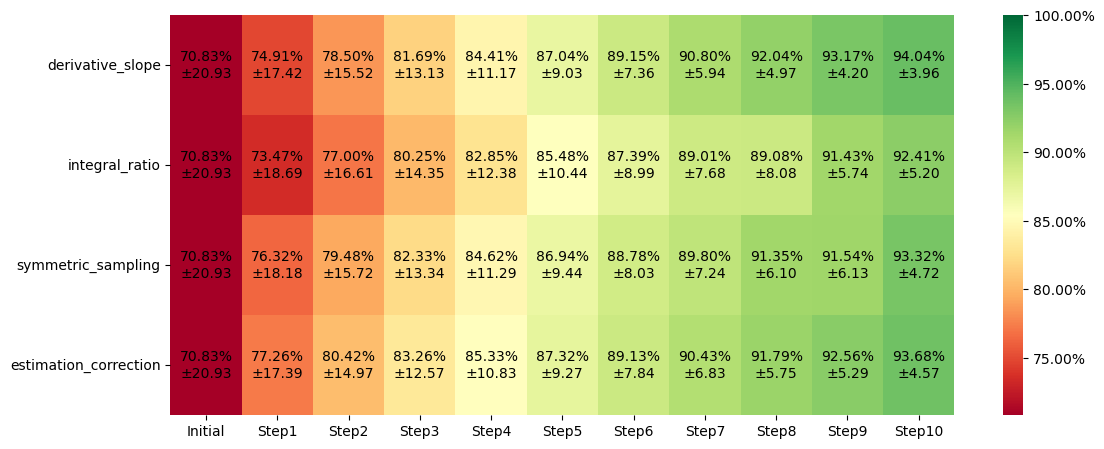

In [194]:
get_results(paths, depth=False)

/tmp/ipykernel_105745/1868250347.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])


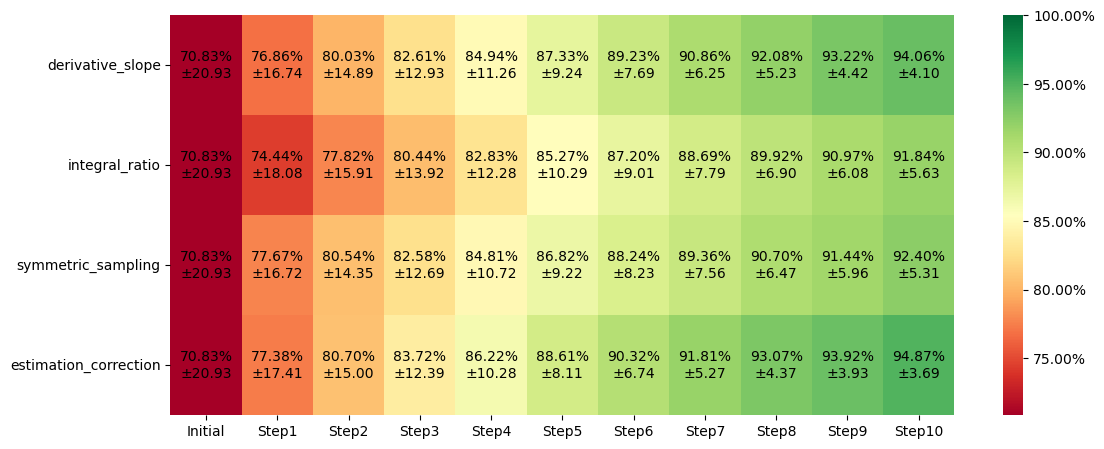

In [7]:
get_results(paths, depth=True)

## Real Case Senarios

In [206]:
path_urban            = paths['Urban'         ]['estimation_correction']
path_over_the_soulder = paths['OverTheSoulder']['estimation_correction']

In [241]:
def clean_df(df, mode='eval'):
    if mode == 'eval':
        # Columns to check
        columns_to_check = ['Initial', 'Step1', 'Step2', 'Step3', 'Step4', 'Step5', 'Step6', 'Step7', 'Step8', 'Step9', 'Step10']

        # Define witch objects to remove from witch column
        object_column = 'Object'
        problematic_object = 'CerealBox'

        # Remove rows where the specified columns have the same value across the row
        df_filtered = df[~df[columns_to_check].apply(lambda x: x.nunique() == 1, axis=1)]

        # Now, remove rows that have the specific value in the specified column
        df_filtered = df_filtered[df_filtered[object_column] != problematic_object]

        return df_filtered
    
    elif mode == 'real':
        # Columns to check
        columns_to_check ['Initial', 'Step1' , 'Step2' , 'Step3' , 'Step4' , 'Step5' , 'Step6' , 'Step7' , 'Step8' , 'Step9', 'Step10',
                            'Step11' , 'Step12', 'Step13', 'Step14', 'Step15', 'Step16', 'Step17', 'Step18', 'Step19', 'Step20']
        
        # Define witch objects to remove from witch column
        object_column = 'Object'
        problematic_object = 'CerealBox'

        # Remove rows where the specified columns have the same value across the row
        df_filtered = df[~df[columns_to_check].apply(lambda x: x.nunique() == 1, axis=1)]

        # Now, remove rows that have the specific value in the specified column
        df_filtered = df_filtered[df_filtered[object_column] != problematic_object]

        return df_filtered

In [242]:
def get_real_results(path):

    # Choose paths for the dataframes
    df = pd.read_csv(path)

    # Clean dfs
    filtered_df = clean_df(df) * 100

    # Calculate the mean for each column in each dataframe
    mean_df = filtered_df[['Initial', 'Step1' , 'Step2' , 'Step3' , 'Step4' , 'Step5' , 'Step6' , 'Step7' , 'Step8' , 'Step9', 'Step10',
                            'Step11' , 'Step12', 'Step13', 'Step14', 'Step15', 'Step16', 'Step17', 'Step18', 'Step19', 'Step20']].mean()

    # Daviation dfs
    mean_deviations_df = filtered_df[['Initial', 'Step1' , 'Step2' , 'Step3' , 'Step4' , 'Step5' , 'Step6' , 'Step7' , 'Step8' , 'Step9', 'Step10',
                            'Step11' , 'Step12', 'Step13', 'Step14', 'Step15', 'Step16', 'Step17', 'Step18', 'Step19', 'Step20']].sub(mean_df).abs().mean()

    # Create a new DataFrame to store the means from each original dataframe
    df_means = pd.DataFrame({
        'df': mean_df[['Initial', 'Step1' , 'Step2' , 'Step3' , 'Step4' , 'Step5' , 'Step6' , 'Step7' , 'Step8' , 'Step9', 'Step10',
                            'Step11' , 'Step12', 'Step13', 'Step14', 'Step15']]
    })

    # Transpose the dataframe so that each row corresponds to an original dataframe
    df_means = df_means.transpose()

    # Rename the index to match the original dataframe names
    df_means.index = ['scores']


    # Create a new DataFrame to store the stds from each original dataframe
    df_std = pd.DataFrame({
        'df': mean_deviations_df[['Initial', 'Step1' , 'Step2' , 'Step3' , 'Step4' , 'Step5' , 'Step6' , 'Step7' , 'Step8' , 'Step9', 'Step10',
                            'Step11' , 'Step12', 'Step13', 'Step14', 'Step15']]
    })

    # Transpose the dataframe so that each row corresponds to an original dataframe
    df_std = df_std.transpose()

    # Rename the index to match the original dataframe names
    df_std.index = ['scores']

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(17, 1))

    # Generate the heatmap
    sns.heatmap(df_means, annot=False, fmt="", cmap='RdYlGn', ax=ax, vmax=100.0)

    # Add the standard deviation to each cell
    for i in range(df_means.shape[0]):     # Loop over rows
        for j in range(df_means.shape[1]): # Loop over columns
            mean_value = df_means.iloc[i, j]
            std_value = df_std.iloc[i, j]
            text = f"{mean_value:.2f}%\n±{std_value:.2f}"
            
            # Place the text in the cell
            plt.text(j + 0.5, i + 0.5, text, 
                    horizontalalignment='center', 
                    verticalalignment='center', 
                    fontsize=10, color='black')

    # Adjust layout to make room for the colorbar
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    # Set the colorbar labels to percentage
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])

    # Show the plot
    plt.show()

/tmp/ipykernel_86857/898682008.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])


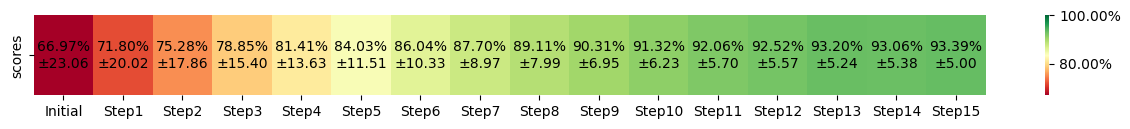

In [243]:
get_real_results(path_urban)

/tmp/ipykernel_86857/898682008.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f"{x:.2f}%" for x in cbar.get_ticks()])


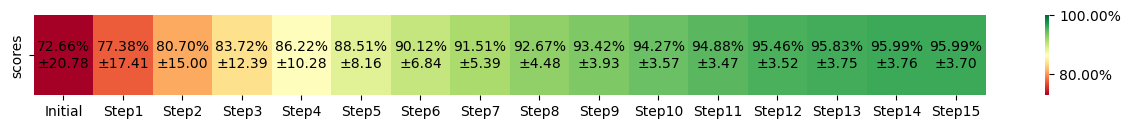

In [244]:
get_real_results(path_over_the_soulder)